In [37]:
import math
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

import keras
from keras import backend as K
from keras.layers import Dense, Input
from keras.models import Model

from IPython.display import Image

from sklearn.datasets import make_classification, make_regression

# Today 

1. Introduction: from biological view to <b>computation graph</b>
2. <b>Logistic regression</b> as the simplest form of NN
3. One step deeper: <b>fully connected layers</b>
4. Common <b>activation functions</b>
5. Training with <b>gradient descent</b>
6. <b>Relugarization</b> techniques
7. Some fun with <b>initializations</b>
8. Articles    

<img src="http://www.psychologyinaction.org/wp-content/uploads/2011/04/neuron11.jpg">

# Mathematical model of biological neuron

$$a = f(w^Tx + b)$$

1. $x \in R^n$ - input signal values
2. $w \in R^n$ - weights 
3. $b \in R$ - bias term  
4. $f(z)$ - activation function  
5. $a \in R$ - neuron output value

## Better to think in terms of computation graph
<img src="http://ischlag.github.io/images/graph_example.png">

## Graphs may be huge and intractable from biological side of view
<img src='http://bamos.github.io/data/2016-08-09/tensorboard-graph.gif'>

# Recap: Logistic regression

$$a = \sigma(w^Tx+b)$$

1. $a \in [0, 1]$ - probability $P(y=1|x)$
2. $x \in R^n$ - input features
3. $w \in R^n$, $b \in R$ - unknown parameters
4. $\sigma(z) = \frac{1}{1+exp(-z)}$ - sigmoid activation function
5. $\sigma(z)$ properties:  
$\lim_{z \to -\infty} \sigma(z) = 0$   
$\lim_{z \to \infty} \sigma(z) = 1$  
$\sigma(0) = \frac{1}{2}$  

### Solution steps:
1. Define loss function: <b>log loss</b>  
2. Choose initial initialization of $w$, $b$: <b>zeros</b>  
3. Choose optimization algorithm: <b>gradient descent / L-BFGS</b>

# Loss function for classification: cross-entropy

1. Suppose we have a discrete random variable $A$ with outcomes ${A_1, A_2, A_3}$ and probabilites ${p_1, p_2, p_3}$
2. If event $A_j$ occurres with probability $p_j$ then "<b>information value</b>" of $A_j$ ("surprise of seeing" $A_j$) is defined as $$I(A_j)=-log(p_j)$$
3. <b>Entropy</b> - is the expectation of "surprise" about outcomes of random variable $A$ $$H(p) = -\sum{p_j*log(p_j)}$$
4. <b>Cross-entropy</b> - is the expectation of "surprise" about outcomes of $A$ if we use <b>approximation</b> ${q_1, q_2, q_3}$ instead of ${p_1, p_2, p_3}$: $$H(p, q) = -\sum{p_j*log(q_j)}$$

So, <b>lower</b> cross-entropy means <b>better</b> approximation

### Binary cross-entropy (log loss)
$$l(\theta\|x_j,y_j)=-(y_j*log(P(y=1\|\theta,x_j))+(1-y_j)*log(1-P(y=1\|\theta,x_j)))$$
$$L(\theta\|X,Y)=\sum_{(x_j, y_j)}{l(\theta\|x_j,y_j)}$$
$$x_j \in R^n, y_j \in \{0,1\}=B^2$$

### Categorical cross-entropy
$$l(\theta\|x_j,y_j)=-\sum_{l=1}^{K}{y_{j,l}*log(P(y=y_{j,l}\|\theta,x_j))}$$
$$L(\theta\|X, Y)=\sum_{(x_j, y_j)}{l(\theta\|x_j, y_j)}$$
$$x_j \in R^n, y_j \in B^K$$

### In real life
1. from keras.objectives import binary_crossentropy  
2. from keras.objectives import categorical_crossentropy 
3. ...

# Gradient descent for Logistic Regression

The loss takes the form:
$$L(w\|X,Y)=\sum_{(x_j, y_j)}{l(w\|x_j,y_j)}=-\sum_{(x_j, y_j)}{(y_j*log(\sigma(w^Tx_j))+(1-y_j)*log(1-\sigma(w^Tx_j)))}$$

Taking derivative using chain rule:

$$\frac{\partial{L(w\|X,Y)}}{\partial{w}} = -\sum_{(x_j, y_j)}{\frac{\partial{l(\sigma(w,x_j),y_j)}}{\partial{w}}} = -\sum_{(x_j, y_j)}{\frac{\partial{l(\sigma(w,x_j),y_j)}}{\partial{\sigma(w, x_j)}}*\frac{\partial{\sigma(w,x_j)}}{\partial{w}}}$$

Step of gradient descent:

$$w^{(k+1)} = w^{(k)} - \alpha_{k+1} * \frac{\partial{L(w\|X,Y)}}{\partial{w}}$$

Hyperparameter $\alpha$ is called "<b>learning rate</b>":

1. constant (0.1 - 0.000001)
2. $\alpha_{k} \rightarrow 0$, $k \rightarrow \infty$
3. $\alpha_{k} = \underset{\alpha \in [0, \infty)}{argmin}L(w^{(k)}-\alpha * \nabla{L(w^{(k)})})$

In [33]:
from scipy import special

def lossf(w, X, y):
    return np.sum(np.log(1 + np.exp(-y * np.dot(X, w))))

def gradf(w, X, y):
    return -np.dot(X.T, y * (1.0 - special.expit(y * np.dot(X, w))))

def fit(X, y, lr, eps=10e-4):
    n, d = X.shape
    w = np.zeros(shape=d)
    
    i, loss_delta = 0, np.inf
    while loss_delta >= eps:
        loss_before = lossf(w, X, y)
        w = w - lr * gradf(w, X, y)    
        loss_after = lossf(w, X, y)
        
        loss_delta = np.abs(loss_before - loss_after)
        
        if i % 10 == 0:
            print ('Iter: %s, Loss: %s, Loss delta: %s' % (i, loss_after, loss_delta))
        
        i += 1

    return w

X, Y = make_classification(n_samples=100, n_classes=2, n_features=10, n_informative=5)

fit(X, Y, lr=0.01)

Iter: 0, Loss: 47.0019119753, Loss delta: 22.3128060807
Iter: 10, Loss: 41.1067750071, Loss delta: 0.214315871762
Iter: 20, Loss: 39.7564688892, Loss delta: 0.0951100012265
Iter: 30, Loss: 39.0419093682, Loss delta: 0.0569458268058
Iter: 40, Loss: 38.5820020081, Loss delta: 0.0387385101504
Iter: 50, Loss: 38.2555065422, Loss delta: 0.0284559136312
Iter: 60, Loss: 38.0084184298, Loss delta: 0.0220599862764
Iter: 70, Loss: 37.8125512231, Loss delta: 0.017804034876
Iter: 80, Loss: 37.6517313041, Loss delta: 0.0148215452631
Iter: 90, Loss: 37.5160286404, Loss delta: 0.0126428579098
Iter: 100, Loss: 37.3990160794, Loss delta: 0.0109960772465
Iter: 110, Loss: 37.2963511742, Loss delta: 0.00971528240613
Iter: 120, Loss: 37.2049931592, Loss delta: 0.00869471289206
Iter: 130, Loss: 37.1227472364, Loss delta: 0.00786443369265
Iter: 140, Loss: 37.0479873913, Loss delta: 0.00717672583681
Iter: 150, Loss: 36.9794813436, Loss delta: 0.00659813408966
Iter: 160, Loss: 36.9162763611, Loss delta: 0.0061

array([ 0.66063851,  0.71995081, -3.00165447,  0.67810883, -1.31600051,
       -1.94005433, -0.02105116, -2.35434853, -3.39993397,  0.75961562])

# Going deeper: fully connected layers

$$a_0 = x$$
$$a_i = f_{i}(W_{i}a_{i-1}+b_i)$$
$$i=0,1,...,K$$

1. $a_i \in R^{M_i}$ - activations of $i-1$ layer
2. $W_i \in R^{M_{i}*M_{i-1}}$ - weights matrix
3. $b_i \in R^{M_i}$ - vector of biases
4. $f_{i}(z)$ - any activation function (apply elementwise)

Also known as Multilayer Perceptron. And it is <b>just a composite function</b> with bunch of unknown parameters:  
$$g(x)=f_3(W_3f_2(W_2f_1(W_1x+b_1)+b_2)+b_3)$$

Parameters could be estimated from dataset using the same approach - Gradient Descent.

# Activation functions

### Sigmoid
$$f(z)=\frac{1}{1+exp(-z)}$$
Looks like:
<img src="http://cs231n.github.io/assets/nn1/sigmoid.jpeg">

<b>Do not use this for hidden units!</b>

Use it for output unit if you are solving binary classification (independent multiclass classification) task and you need probabilities.

It will bring you a lot of troubles: 
1. Activations are non centered around zero
2. Neurons saturation (you event cannot learn <b>anything</b> in some cases)
3. Vanishing gradient problem for deep architectures (many multiplications on small numbers)
4. ...

# Activation functions

### Tanh
$$f(z)= \tanh(z) = 2 \sigma(2z) -1$$
Looks like:
<img src="http://cs231n.github.io/assets/nn1/tanh.jpeg">

1. Just a rescaled sigmoid
2. Activations centered around zero
3. <b>Neurons saturation is still a problem</b>
4. Always prefered over sigmoid, but nowadays is rather obsolete

# Activation functions

### ReLU (Rectified Linear Unit)
$$f(z)=max(0,z)$$
Looks like: 
<img src="http://cs231n.github.io/assets/nn1/relu.jpeg">

1. Very common in CNN (which are deep)
2. Fast to compute
3. <b>One of the reasons why deep learning works</b>
4. But activations are not zero-centered 
5. In some situations neurons could "die" during training process
6. A good starting point - <b>use ReLU for hidden activations</b>

# Activation functions

### ELU (Exponential Linear Unit)

$$f(z) =
    \begin{array}{lr}
        z, & \text{for } z > 0\\
        \alpha (exp(z)-1), & \text{for } z \leq 0
    \end{array}
$$

Family of "xxxLU" looks like:
<img src="https://ai2-s2-public.s3.amazonaws.com/figures/2016-11-08/0b8759d61e93b809df16d9fe9010d2a2d7241c74/4-Figure1-1.png">

Looks like better then ReLU for SGD convergence:

<img src="https://media.licdn.com/mpr/mpr/AAEAAQAAAAAAAAZwAAAAJDI2ZWNmM2UwLWNlOTItNDAxNC1iYjlmLWVlYzFlOGI2MjRiMw.png">

1. $\alpha$ is hyperparameter ($\alpha = 1$ as default)
2. More zero-centered that ReLU
3. No dead neurons (I suppose)
4. In many benchmarks provides faster convergence than ReLU
5. Seems like the following standard instead of ReLU
6. Quite new (publication in 2016)

# Activation functions

### MaxOut
For $k=2$:
$$f(x)=max(Wx+a,Ux+b)$$
Looks like (depends on $k$): 
<img src="https://www.researchgate.net/profile/Zhibin_Liao/publication/280695837/figure/fig1/AS:284565710098447@1444857160419/Figure-1-Piecewise-linear-activation-functions-ReLU-2-LReLU-3-PReLU-4-and.png">

1. Doesn't have functional form like $f(Wx+b)$
2. Can approximate many others function forms (quadratic and etc.)
3. <b>Brings even more parameters in your network (k times more)</b>

# Activation functions

### Softmax
$$\sigma_j(z)=\frac{exp(z_j)}{\sum_{l=1}^{K}{exp(z_l)}}$$
$$j=1,...,K$$
$$z \in R^K$$

1. Forms <b>categorical distribution of K classes</b>
2. Often used as output layer for multiclass classification problems 
3. Categorical cross-entropy is a standard for loss function
4. You can trap into computation trouble if you have 1000000 classes (like in Word2Vec)

# Gradient descent for MLP

1. Suppose we are solving regression problem with multilayer perceptron (so, $x_j \in R^n$, $y_j \in R$)
2. We want $g(x) \in R$, so we use <b>linear activation</b> on the last layer:
$$y=g(x)=W_3 f_2(W_2 f_1(W_1x+b_1)+b_2)+b_3$$
$$a_1(x)=f_1(W_1x+b_1)$$
$$a_2(x)=f_2(W_2a_1+b_2)$$
$$y=a_3(x)=W_3a_2+b_3$$
3. Loss function is MSE: $$L(W_1,W_2,W_3,b_1,b_2,b_3\|X,Y) = \frac{1}{2N}\sum_{(x_j, y_j)}{(g(x_j\|W_1, W_2, W_3, b_1, b_2, b_3)-y_j)^2} = \frac{1}{2N}\sum_{(x_j, y_j)}{(a_3(x_j)-y_j)^2}$$

### Gradient calculation:
1. For $W_3$ (note, that only $a_3$ depends on $W_3$):
$$\frac{\partial{L}}{\partial{W_3}} = \frac{1}{N}\sum_{(x_j, y_j)}{\frac{\partial{l(x_j,y_j)}}{\partial{W_3}}} = \frac{1}{N}\sum_{(x_j, y_j)}{\frac{\partial{l(a_3(x_j), y_j)}}{\partial{a_3}}*\frac{\partial{a_3(x_j\|a_2,W_3,b_3)}}{\partial{W_3}}}= \\ \frac{1}{N}\sum_{(x_j, y_j)}{(a_3(x_j)-y_j)*a_2(x_j)}$$
2. For $W_2$ (only $a_2$ depends on $W_2$:
$$\frac{\partial{L}}{\partial{W_2}} = \frac{1}{N}\sum_{(x_j, y_j)}{\frac{\partial{l(x_j,y_j)}}{\partial{W_2}}} = \frac{1}{N}\sum_{(x_j, y_j)}{\frac{\partial{l(a_3(x_j), y_j)}}{\partial{a_3}}*\frac{\partial{a_3(x_j\|a_2,W_3,b_3)}}{\partial{a_2}}*\frac{\partial{a_2(x_j\|a_1,W_2,b_2)}}{\partial{W_2}}}= \\ \frac{1}{N}\sum_{(x_j, y_j)}{(a_3(x_j)-y_j)*W_3*f'_2(z_2)*a_1(x_j)}$$
3. For $W_1$ (only $a_1$ depends on $W_1$:
$$\frac{\partial{L}}{\partial{W_1}} = \frac{1}{N}\sum_{(x_j, y_j)}{\frac{\partial{l(x_j,y_j)}}{\partial{W_1}}}= 
\frac{1}{N}\sum_{(x_j, y_j)}{\frac{\partial{l(a_3(x_j), y_j)}}{\partial{a_3}}*\frac{\partial{a_3(x_j\|a_2,W_3,b_3)}}{\partial{a_2}}*\frac{\partial{a_2(x_j\|a_1,W_2,b_2)}}{\partial{a_1}}*\frac{\partial{a_1(x_j\|W_1,b_1)}}{\partial{W_1}}}= \\ \frac{1}{N}\sum_{(x_j, y_j)}{(a_3(x_j)-y_j)*W_3*f'_2(z_2)*W_2*f'_1(z_1)*x_j}$$
4. The same for $b_1, b_2, b_3$

# Backpropagation algorithm

1. <b>Backpropagation</b> is just an efficient way to calculate partial derivatives with respect of network parameters
2. <b>Backpropagation</b> consists of two steps: <b>forward pass</b> and <b>backward pass</b>
3. <b>Forward pass</b> evaluating network output value and loss value
4. <b>Backward pass</b> calculating gradient
5. Let's look at <b>backward pass</b>:
$$\frac{\partial{L}}{\partial{W_2}} = \frac{1}{N}\sum_{(x_j, y_j)}{(a_3(x_j)-y_j)*W_3*f'_2(z_2)*a_1(x_j)}$$
$$\frac{\partial{L}}{\partial{W_1}} = \frac{1}{N}\sum_{(x_j, y_j)}{(a_3(x_j)-y_j)*W_3*f'_2(z_2)*W_2*f'_1(z_1)*x_j}$$
Note, that:  
$\frac{\partial{L}}{\partial{W_2}}$ and $\frac{\partial{L}}{\partial{W_1}}$ has many common terms - we need cache them.  
Also we need to cache intermediate results of forward pass ($a_1, a_2, a_3, z_1, z_2$).  
Then we can calculate gradient very efficently.
6. There are two main problems: <b>vanishing gradient</b> and <b>explosive gradient</b>
7. Two main sources of them are multiplication on weights $W_l$ and multiplication on $f'_l(z_l)$
8. We can beat <b>vanishing gradient</b> problem with good choice of <b>activation functions</b> (xxxLU family) and smart <b> weights initialization</b> (we'll see a good example later)
9. Also more advanced techniques could be used for gradients flow boosting in the network
10. We cat beat <b>explosive gradient</b> problem using <b>gradient rescaling</b> (gradient clipping) idea:
$$
\frac{\partial{L}}{\partial{W_l}} = 
    \begin{array}{lr}
        \frac{\partial{L}}{\partial{W_l}}, & \text{if } \|\frac{\partial{L}}{\partial{W_l}}\| \leq \gamma \\
        \gamma * \frac{\frac{\partial{L}}{\partial{W_l}}}{\|\frac{\partial{L}}{\partial{W_l}}\|},& \text{if } \|\frac{\partial{L}}{\partial{W_l}}\| > \gamma
    \end{array}
$$
Constant $\gamma$ is hyperparameter (typically 5.0 or something close).

Let's look at code example for earlier defined problem.

In [507]:
X, Y = make_regression(n_samples=10000, n_features=50, n_informative=25)
Y = np.expand_dims(Y, 1)

N, M = X.shape

def relu(z):
    q = z.copy()
    q[q <= 0] = 0.0
    return q

def drelu(z):
    q = z.copy()
    q[q > 0] = 1.0
    q[q <= 0] = 0.0
    return q
    
def init_dense_layer(fan_in, fan_out, eps=0.005):
    W = np.random.uniform(low=-eps, high=eps, size=(fan_in, fan_out))
    b = np.zeros(fan_out) + 0.01
    return W, b

W1, b1 = init_dense_layer(M, 10)
W2, b2 = init_dense_layer(10, 10)
W3, b3 = init_dense_layer(10, 1)

def forward_pass():
    z1 = np.dot(X, W1) + b1 
    a1 = relu(z1)
    
    z2 = np.dot(a1, W2) + b2
    a2 = relu(z2)
    
    a3 = np.dot(a2, W3) + b3
    
    return {'z1': z1, 'a1': a1, 'z2': z2, 'a2': a2, 'a3': a3}

def compute_loss():
    y_predicted = forward_pass()['a3']
    return 0.5 * np.sum((y_predicted - Y)**2) / N
    
def backward_pass(fwd):
    dL_da3 = (fwd['a3'] - Y) / N
    delta_3 = dL_da3
    
    dL_dW3 = np.dot(fwd['a2'].T, delta_3)
    dL_db3 = np.sum(delta_3, axis=0)
    assert W3.shape == dL_dW3.shape
    
    delta_2 = np.dot(delta_3, W3.T) * drelu(fwd['z2'])
    dL_dW2 = np.dot(fwd['a1'].T, delta_2)
    dL_db2 = np.sum(delta_2, axis=0)
    assert W2.shape == dL_dW2.shape
    
    delta_1 = np.dot(delta_2, W2.T) * drelu(fwd['z1'])
    dL_dW1 = np.dot(X.T, delta_1)
    dL_db1 = np.sum(delta_1, axis=0)
    assert W1.shape == dL_dW1.shape
    
    derivatives = {
        'W3': dL_dW3, 'W2': dL_dW2, 'W1': dL_dW1,
        'b3': dL_db3, 'b2': dL_db2, 'b1': dL_db1
    }
    
    return derivatives

grad_iters = 10000
grad_scaling = 5.0
lr = 0.05

for i in range(grad_iters):
    intermediate_results = forward_pass()
    d = backward_pass(intermediate_results)
    
    # "Gradient rescaling" looks like this
    for name, grad_value in d.items():
        grad_norm = np.linalg.norm(grad_value.flatten())
            
        scaling_den = max(grad_scaling, grad_norm)
        grad_value *= (grad_scaling / scaling_den)
    
    W1 -= lr * d['W1']
    b1 -= lr * d['b1']
    
    W2 -= lr * d['W2']
    b2 -= lr * d['b2']
    
    W3 -= lr * d['W3']
    b3 -= lr * d['b3']
    
    if i % 100 == 0:
        current_loss = compute_loss()
        print('Iter: %s, Loss: %s' % (i, current_loss))

Iter: 0, Loss: 30441.3681137
Iter: 100, Loss: 785.586047275
Iter: 200, Loss: 569.7182516
Iter: 300, Loss: 437.292317393
Iter: 400, Loss: 218.74252515
Iter: 500, Loss: 158.652091789
Iter: 600, Loss: 132.99308854
Iter: 700, Loss: 116.332266958
Iter: 800, Loss: 108.375220493
Iter: 900, Loss: 104.862597131
Iter: 1000, Loss: 103.056712527
Iter: 1100, Loss: 101.972647765
Iter: 1200, Loss: 101.18078782
Iter: 1300, Loss: 100.441289578
Iter: 1400, Loss: 99.6883858494
Iter: 1500, Loss: 98.8937027288
Iter: 1600, Loss: 98.2164203207
Iter: 1700, Loss: 97.6774801805
Iter: 1800, Loss: 97.250078144
Iter: 1900, Loss: 96.9062960202
Iter: 2000, Loss: 96.6091768757
Iter: 2100, Loss: 96.3500931798
Iter: 2200, Loss: 96.1254945504
Iter: 2300, Loss: 95.9275086661
Iter: 2400, Loss: 95.7525758998
Iter: 2500, Loss: 95.5949238924
Iter: 2600, Loss: 95.4532531227
Iter: 2700, Loss: 95.3274374613
Iter: 2800, Loss: 95.2115732526
Iter: 2900, Loss: 95.1054647128
Iter: 3000, Loss: 95.008152043
Iter: 3100, Loss: 94.917497

# Scaling gradient descent

1. Suppose that our dataset contains N=$10^6$ training pairs
2. Then for <b>one update of weights</b> with gradient descent we must compute sum of $10^6$ elements:
$$\frac{\partial{L}}{\partial{W_k}} = \sum_{j=1}^{10^6}{\frac{\partial{l(x_j,y_j)}}{\partial{W_k}}}$$
3. <b>Forward and backward pass may be computationally intensive</b> in modern networks architectures (>= 100-200ms on GTX-1080)
4. So computing full gradient is still expensive and convergence may take years
5. To solve this issue we must reduce the complexity $O(N) \rightarrow O(1)$
6. Thats where idea of <b>Stochastic Gradient Desent</b> arises

# Stochastic Gradient Descent

### Empirical loss is an expectation
$$L(W,X,Y)=\frac{1}{N}\sum_{j=1}^{N}{l(x_j,y_j,W)} \approx E_{(X,Y)}[L(W)]$$

### Full gradient descent
$$W^{(k+1)} = W^{(k)} - \alpha_{k+1} \nabla E_{(X,Y)}[L(W)]$$
where 
$$\nabla E_{(X,Y)}[L(W)] \approx \frac{1}{N}\sum_{j=1}^{N}{\nabla l(x_j,y_j,W)}$$

### Stochastic gradient descent
$$W^{(k+1)} = W^{(k)} - \alpha_{k+1} \nabla E_{(X,Y)}[L(W)]$$
where 
$$\nabla E_{(X,Y)}[L(W)] \approx \nabla l(x_j,y_j,W)$$
and $(x_j, y_j)$ is <b>taken at random</b>

# SGD issue: Fluctuations

In practice convergence may look like:
<img src="https://image.slidesharecdn.com/pkfetdxyqpiy2i94fvzv-signature-25ed596523f4a669f9a710899d8eaf303c4bbdce8b8e80e99e004c3f91b28bcc-poli-151222094839/95/recommender-systems-50-638.jpg?cb=1450777740">

# SGD issue: Improvements
1. We want more <b>stable approximation</b> of $\nabla E_{(X,Y)}[L(W)]$
2. But still <b>independent of sample size</b>

### Mini-batch Stochastic Gradient Descent

$$W^{(k+1)} = W^{(k)} - \alpha_{k+1} \nabla E_{(X,Y)}[L(W)]$$
where 
$$\nabla E_{(X,Y)}[L(W)] \approx \frac{1}{M}\sum_{j=1}^{M}{\nabla l(x_j,y_j,W)}$$
and $(x_j, y_j)$, $j=1,...,M$ are <b>taken at random</b>.

Here:
1. Hyperparameter $M$ is called <b>batch size</b> and it is a fixed number (<b>usually a power of 2 - GPUs like this</b>)
2. Implicitly we also have hyperparameters $EpochSize$, $EpochsNum$ - tracking <b>how many batches</b> of samples must be taken during training phase 

### Momentum
1. Momentum is similar to <b>exponential moving average of mini-batch weights updates</b>
2. Improves stability when objective has the form of a long shallow ravine leading to the optimum and steep walls on the sides
3. It is usually the case because we have a lot of nonlinearies

$$v^{(k+1)} = \gamma v^{(k)} + \alpha_{k+1} \frac{1}{M}\sum_{j=1}^{M}{\nabla l(x_j,y_j,W)}$$
$$W^{(k+1)} = W^{(k)} - v^{(k+1)}$$

Hyperparameter $\gamma \in (0,1]$ determines for how many iterations the previous gradients are incorporated into the current update.

# SGD issue: Improvements

1. SGD is <b>sensible to features scaling</b> (look at image)
2. You should use <b>learning rate decay</b> technique (learning rate becomes smaller with number of updates iterations) to reduce fluctation around local optimum 
3. But if you have <b>sparse features</b> then for infrequent ones it is not a good solution (possibly some weight will have very rare and bery small updates)

<img src="http://img.blog.csdn.net/20160215232458619">

# SGD issue: Improvements

1. The idea is too use <b>adaptive learning</b> rate for each weight
2. You start with predefined learning rate value (0.01, for example)
3. Decay of learning rate for each weight depends on <b>history of its derivate values</b> (not on the current iteration number)

$$g=\nabla L(W)$$
$$E[g^2]_{k} = \beta * E[g^2]_{k-1} + (1-\beta) * g^{2}_{k}$$
$$W^{(k+1)} = W^{(k)} - \frac{\alpha}{\sqrt{E[g^2]_{k} + \epsilon}} g_{k}$$

Here:
1. Scaling of $\alpha$ depends on exponential moving average of squared gradients (with smoothing parameter $\beta$)
2. Scaling is applied elementwise (each operation is elementwise)
3. Where $\epsilon$ is a small constant in order not to devide by zero

### If we'll combine all described techiques together we'll get ADAM algotithm.

# Other variations exists

But <b>Adam</b> works well in practice (in most seen cases).

<img src="http://2.bp.blogspot.com/-q6l20Vs4P_w/VPmIC7sEhnI/AAAAAAAACC4/g3UOUX2r_yA/s1600/s25RsOr%2B-%2BImgur.gif">

# Other gradient flow boosting techniques

### Residual connections
<img src="https://cdn-images-1.medium.com/max/800/1*jNyv5wv-LyXfRb3Ye1q0jA.png">

### Auxiliary losses
<img src="https://image.slidesharecdn.com/bim-01googledean-160516180952/95/largescale-deep-learning-for-building-intelligent-computer-systems-a-keynote-presentation-from-google-25-638.jpg?cb=1464012999">

After decomposition into separate blocks:
<img src="http://joelouismarino.github.io/images/blog_images/blog_googlenet_keras/googlenet_components.png">

1. Both of them helps to reduce vanishing gradient problem.
2. Auxiliary losses could be used as regularizers.

# Basic regularization techniques

1. Modern network architectures contains <b>a lot of parameters</b> (138M parameters in VGG16)
2. Even with 10M dataset it ~ 13.8 times more then data points
3. So overfit is really an issue
4. For big networks you must <b>always use regularization</b>
5. It is also trendy nowadays to use more advanced architectures in order to reduce amount of params without loosing predictive power (1x1 convolutions for example)

## Weights decay
1. Also known as L2 regularization
2. Biases usulally don't have any regulzrization 
3. Solving $L^2$-regularized problem is like searching MAP (<b>Maximum a posteriori</b>) estimation of parameters
4. Same for $L^1$ regularization
$$L(W\|X, Y)=\sum_{(x_j, y_j)}{l(W\|x_j, y_j)} + \frac{\lambda}{2}\|W\|^2$$

## Dropout
1. Is modern and powerfull regularization technique (paper of 2014)
2. The idea is to <b>set some randomly selected portion of activations to zero</b> in forward pass and backpropagate only throught active neuros
<img src="http://cs231n.github.io/assets/nn2/dropout.jpeg">
3. You can think about it like <b>ensembling many networks</b>, where each initialized with weights of previous and trained only on one mini-batch
4. It is a <b>differentiable operation</b>, so we can use backprop without any troubles
5. Some hacks appears in prediction phase (we must use all neurons activations without dropout) 
6. <b>Mostly tested on classification tasks</b> (personally I didn't recieve any boost of using it in regression tasks)

## Other (less popular) methods
1. ElasticNet - combination of $L_2$ and $L_1$
2. Dropconnect - drops weights, not activations (unlike Dropout)
3. MaxNorm - tracking norm of weights

In [508]:
# TODO: add dropout forward and backward pass implementation here

# But it's not the way we want to work!

Notice that:
1. For every operation (having some learnable parameters) we must implement only gradient with respect of this parameters and inputs
2. We can construct complex operations from bunch of simplier
3. We have backprop, which handles everything about gradients in computational graph  
4. We don't want to think much about computational stability ($log(x)$ when $x$ is near $0$, initial initialization and so on)
5. Also we don't want to think much about gradient descent implementation

Thats why we like:
1. <b>Keras</b>
2. <b>TensorFlow</b>
3. Theano
4. Torch
6. Caffe
7. MxNet
8. Neon
9. ...

A lot of benefits:
1. Easier development and deployment process
2. CPU / GPU implementations of gradients calculation
3. Debug and visualization tools
4. Common data preprocessing utilities
5. Distributed computations (at least with TensorFlow)
6. ...

<b>You must concentrate on problem solving, not on the rest.</b>

# Keras framework

1. Common high level operations based on simplier ones (provided by <b>backend</b>)
2. Backend is either <b>TensorFlow</b> or Theano (TensorFlow is preferable nowadays)
3. Opensource project, quite good tested
3. Very Pythonic
4. Has <b>Sequential</b> and <b>Graph</b> models API (you should use Graph API
5. Easily extensible (you can define your own complex ops)
6. Has very good documentation: https://keras.io/
7. Will be merged with TensorFlow code since 1.1 (in contrib subpackage), since 1.2 will be merged with main code base
8. You'll have most the benefits of TensorFlow 1.0 (Tensorboard, tfdebug, XLA compilation - possible, TenserFlow Serving, ...)

Let's try it out:
1. pip install tensorflow=1.0.0 (pip install tensorflow-gpu=1.0.0)
2. pip install keras=1.2.2

# Example 1: Logistic Regression (Perceptron)

In [39]:
X, Y = make_classification(n_samples=1000, n_classes=2, n_features=25, n_informative=5)

import keras

from keras.layers import Dense, Input
from keras.models import Model

x = Input(shape=(X.shape[1], ))
y = Dense(output_dim=1, activation='sigmoid')(x)

model = Model(input=x, output=y)

model.compile(optimizer='adam', loss='binary_crossentropy')

model.fit(X, Y, batch_size=50, nb_epoch=10, verbose=1)

model.output_layers[0].get_weights()[0].flatten()

Epoch 1/10
1000/1000 [==============================] - 0s - loss: 0.8735     
Epoch 2/10
1000/1000 [==============================] - 0s - loss: 0.8162     
Epoch 3/10
1000/1000 [==============================] - 0s - loss: 0.7652     
Epoch 4/10
1000/1000 [====

array([-0.55856878, -0.08558576,  0.20855032, -0.06819488,  0.32002622,
       -0.04486463,  0.18169469, -0.10540755,  0.20238911, -0.15486851,
       -0.22203782,  0.32436141,  0.23049158,  0.04330679, -0.31131306,
       -0.06767005, -0.37707305,  0.09778725, -0.27377102,  0.16192733,
        0.1827877 ,  0.2627089 , -0.29786813, -0.0366699 ,  0.25736496], dtype=float32)

# Example 2: Multilayer Perceptron for Regression

In [42]:
X, Y = make_regression(n_samples=1000, n_features=25, n_informative=5)

x = Input(shape=(X.shape[1], ))

y = Dense(output_dim=10, activation='relu')(x)
y = Dense(output_dim=10, activation='relu')(y)
y = Dense(output_dim=1, activation='linear')(y)

model = Model(input=x, output=y)

model.compile(optimizer='adam', loss='mse')
model.fit(X, Y, batch_size=25, nb_epoch=25, verbose=1)

model.output_layers[0].get_weights()[0].flatten()

Epoch 1/25
1000/1000 [==============================] - 0s - loss: 30215.7583      
Epoch 2/25
1000/1000 [==============================] - 0s - loss: 30140.4033     
Epoch 3/25
1000/1000 [==============================] - 0s - loss: 30043.3445     

array([ 2.01301765,  2.02982259, -1.44887769,  1.25195372, -1.76276588,
       -1.34336364, -1.31772745, -0.98509347, -1.1799866 , -1.42299533], dtype=float32)

# Weights initialization

Is another calculus aspect which helps training deep architectures a lot.

1. The way you must initialize your weights usually depends on chosen activation function
2. <b>All zeros doesn't work</b>
3. In past engeniers used sampling from $U[-eps,eps]$ or $N(0, eps)$
4. But for deep networks (>= 8 layers) it didn't work, so they used greedy layerwise pretraining
5. Good initial weights initialization helps train deeper networks (up to 20-30 CNN layers)
6. If you go deeper you should think about residuals connections / auxiliary losses for futher improvement of gradients flow

### Why all zeros doesn't work?
Suppose $L^2$ loss and MLP with 2 layers:
$$l(x_j, y_j) = \frac{1}{2}(a_2(x_j)-y_j)^2 = \frac{1}{2}((W_2f_1(W_1x_j+b_1)+b_2)-y_j)^2$$

Let's compute gradient with respect of $W_1$:
$$\frac{\partial{l(x_j, y_j)}}{\partial{W_1}} = (a_2(x_j)-y_j)*\frac{\partial{a_2}}{\partial{a_1}}*\frac{\partial{a_1}}{\partial{W_1}} = (a_2(x_j)-y_j)W_2\frac{\partial{a_1}}{\partial{W_1}}$$
so, <b>no learning here as $W_2$ is zero</b>.

But, if $W_k$ is sampled from some distribution ($U[-eps, eps]$, $N(0, eps)$) - then it works quite good (<b>for shallow networks</b>)

# Why it doesn't work for deeper architectures?

Special numerical analysis needed, there are some papers focused on such issues.

Suppose that we use ReLU at every layer. And let's empirically show that:
1. W = <b>0.05</b> * np.random.randn(fan_in, fan_out) doesn't work in practice
2. W = <b>np.sqrt(2. / fan_in)</b> * np.random.randn(fan_in, fan_out) works quite good

In [57]:
def build_mlp_network(layer_size, layers_num, activation, initialization):
    outputs = []
    input_layer = Input(shape=(layer_size, ), name='input')
    
    x = input_layer
    for i in range(1, layers_num + 1):
        x = Dense(output_dim=layer_size, init=initialization, activation=activation, name='dense_%s' % i)(x)
        outputs.append(x)
        
    model = Model(input=input_layer, output=outputs)
    
    return model

In [58]:
def plot_activations_histograms(model, data_size, plots_by_col=4, bins_count=50, apply_log=False):
    input_size = int(model.input.get_shape()[1])
    data = np.random.randn(data_size, input_size)
    
    result = model.predict(data)
    activation_name = model.get_layer('dense_1').activation.__name__
    initialization_name = model.get_layer('dense_1').init.__name__

    rows_count = int(math.ceil(len(result) / plots_by_col))
    
    fig = plt.figure(figsize=(14, 8))
    fig.suptitle('Activation: "%s", Initialization: "%s"' % (activation_name, initialization_name), fontsize=16)
    
    for layer_idx, layer_result in enumerate(result, 1):
        ax = plt.subplot(rows_count, plots_by_col, layer_idx)
        ax.hist(layer_result.flatten(), range=(-1, 1), bins=bins_count, log=apply_log)
        ax.set_title('dense_%s' % layer_idx)
    
    plt.show()    

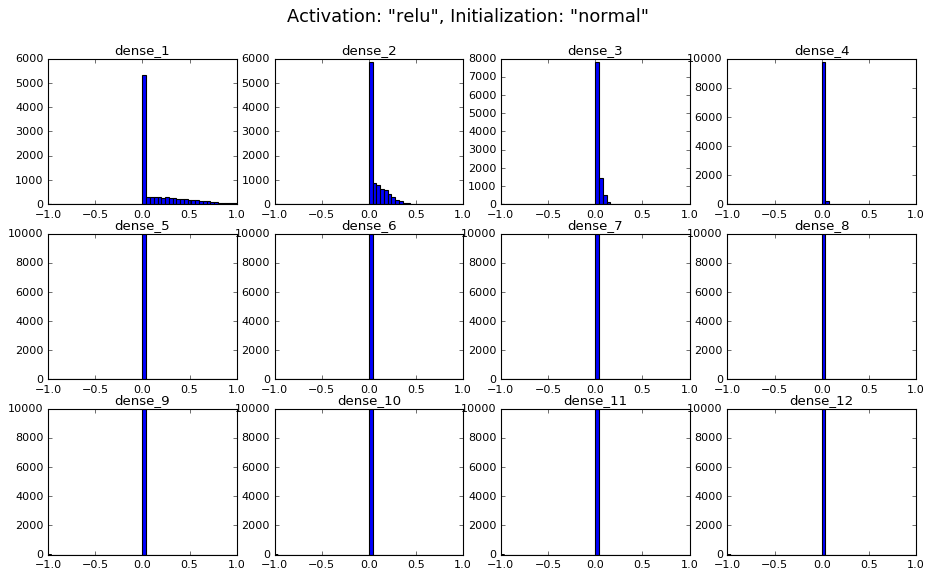

In [62]:
model = build_mlp_network(100, 12, 'relu', 'normal')
plot_activations_histograms(model, 100)

1. All activations are collapsing!
2. And <b>it is the issue</b> because in the backward path we'll perform practically the same operations - multiplying by $W_l$:

$$l(x_j, y_j) = \frac{1}{2}(a_3(x_j)-y_j)^2 = \frac{1}{2}((W_3f_2(W_2f_1(W_1x_j+b_1)+b_2)+b_3)-y_j)^2$$

$$\frac{\partial{l(x_j, y_j)}}{\partial{W_1}} = (a_3(x_j)-y_j)*\frac{\partial{a_3}}{\partial{a_2}}*\frac{\partial{a_2}}{\partial{a_1}}*\frac{\partial{a_1}}{\partial{W_1}} = (a_3(x_j)-y_j)W_3f'_2(z_2)W_2f'_1(z_1)x_j$$

<b>As the result, gradients on first layers will become very tiny (early layers practically learns nothing!)</b>

Solution is to play with variance of initial distribution.

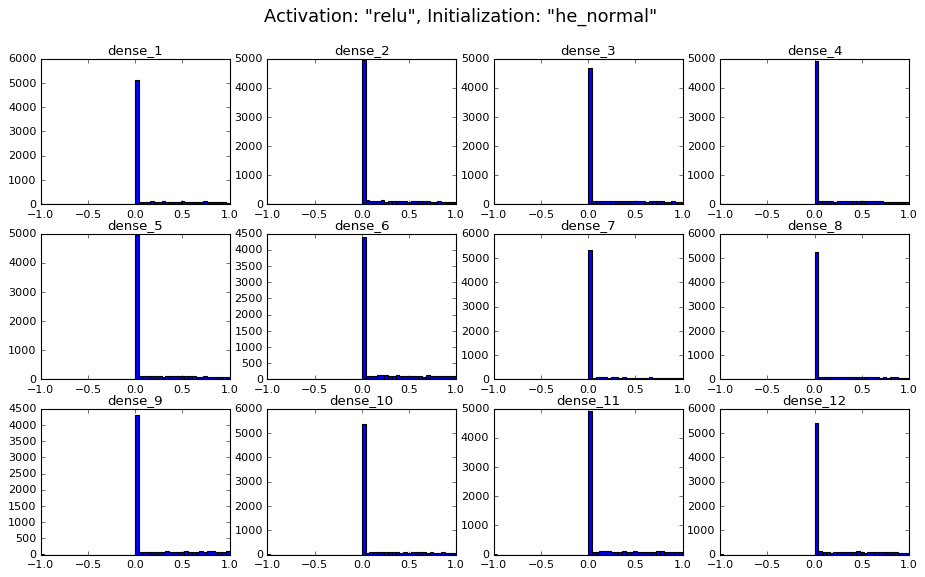

In [67]:
model = build_mlp_network(100, 12, 'relu', 'he_normal')
plot_activations_histograms(model, 100)

# Open questions

1. As you see, we have a lot of hyperparameters - usually you try only some combinations and it is ok
2. Second order methods (L-BFGS and other quasi-Newtons) doesn't work in mini-batch mode like SGD (currently)
3. SGD is searching local minima - recent research shows that in deep networks there is "no bad local minima"
4. Global optimization methods (like differential evolution) are not widely used (maybe due too many computations)
5. Like vanishing we also have exploading gradients (there is a lot of fun in networks)
6. ...

# Futher reading section

1. ELU paper https://arxiv.org/pdf/1511.07289.pdf
2. ReLU activations analysis https://arxiv.org/pdf/1502.01852.pdf
3. MaxOut networks https://arxiv.org/pdf/1302.4389.pdf
4. Dropout paper http://jmlr.org/papers/volume15/srivastava14a/srivastava14a.pdf
5. Overview of SGD family http://sebastianruder.com/optimizing-gradient-descent/
6. Practical recomendations for Gradient-Based Training of Deep Architectures https://arxiv.org/pdf/1206.5533.pdf

# Next time

1. Keras basics
2. CNNs?
3. Homework on autoencoders?